Acquisition Curriculum Ride Along

NOTE: requires a grades csv which contains some
nulls, and items needing fixing
~ in the form of:


    student_id	exam1	exam2	exam3	final_grade
0       1	    100.0	90	     95	    96
1	    2	    98.0	93	     96	    95

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

In [2]:
df = pd.read_csv("data/student_grades.csv")

In [3]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [4]:
df.shape

(104, 5)

In [5]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.543689,77.307692,81.692308
std,30.166206,14.329988,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.1+ KB


In [7]:
print(df.isnull().sum())

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64


In [8]:
print(df.columns[df.isnull().any()])

Index(['exam1'], dtype='object')


In [9]:
df.exam3.value_counts(sort=True, ascending=True)

              1
79            7
85            8
94            8
70            8
87            8
86            8
95            8
75           16
96           16
78           16
Name: exam3, dtype: int64

In [13]:
# bins won't work yet because of NULL
# df.exam3.value_counts(bins=2)

In [14]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          103 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.1+ KB


In [16]:
df = df.dropna().astype('int')

In [22]:
df.exam3.value_counts(bins=3)

(69.973, 78.667]    39
(87.333, 96.0]      32
(78.667, 87.333]    31
Name: exam3, dtype: int64

In [23]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.343137,78.705882,77.500000,84.264706,81.852941
std,29.844314,14.305429,10.297313,8.763026,10.953002
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


# Visualize Distribution

matplotlib.pyplot

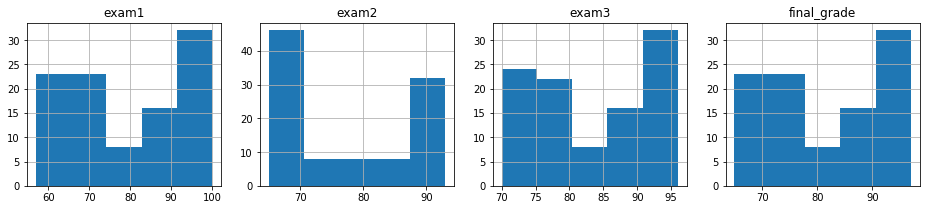

In [24]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

seaborn.boxplot

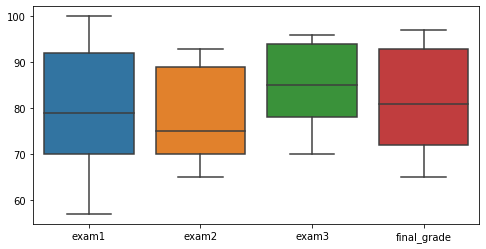

In [25]:
# we don't want to plot the `student_id` column.
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))

# Pipeline Function

In [ ]:
# can also use wrangle_grades.py

In [ ]:
def wrangle_grades():
    grades = pd.read_csv("data/student_grades.csv")
    grades.drop(columns='student_id', inplace=True)
    grades.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = grades.dropna().astype('int')
    return df

# Preprocessing: Split and Scale

In [26]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import wrangle_grades
import env

# Wrangle Data

In [27]:
# acquire data and remove null values 
df = wrangle_grades.wrangle_grades()

# verify acquisition
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 4 columns):
exam1          102 non-null int64
exam2          102 non-null int64
exam3          102 non-null int64
final_grade    102 non-null int64
dtypes: int64(4)
memory usage: 4.0 KB
